В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [4]:
df.shape

(15000, 14)

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(df.drop(columns=['Exited']), df.Exited, test_size=0.2, random_state=12, stratify=df.Exited)

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [6]:
input_cols = X_train.columns
target_col = 'Exited'

inputs = df

train_inputs = X_train[input_cols]
train_targets = y_train.to_frame()[target_col]

val_inputs = X_validation[input_cols]
val_targets = y_validation.to_frame()[target_col]

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [7]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

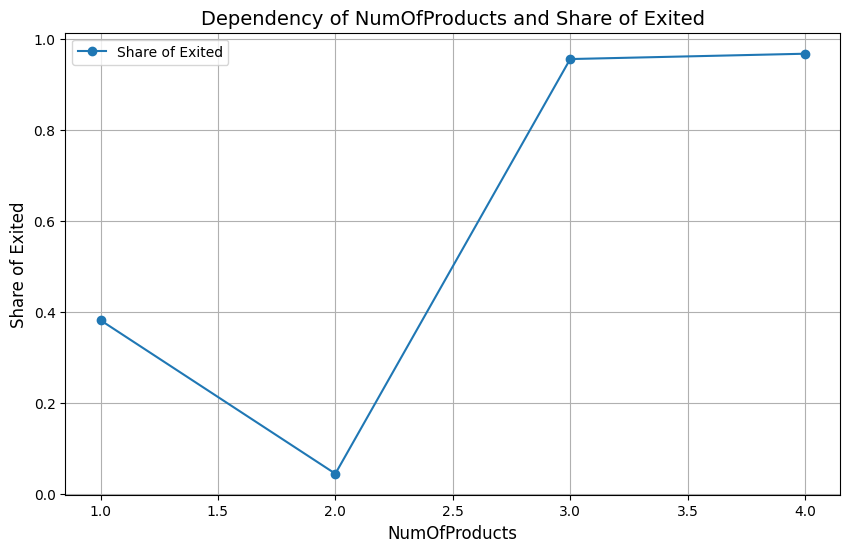

In [8]:
age_exited_share = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
age_exited_share.rename(columns={'Exited': 'Exited_Share'}, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_exited_share['NumOfProducts'], age_exited_share['Exited_Share'], marker='o', linestyle='-', label='Share of Exited')
plt.title('Dependency of NumOfProducts and Share of Exited', fontsize=14)
plt.xlabel('NumOfProducts', fontsize=12)
plt.ylabel('Share of Exited', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

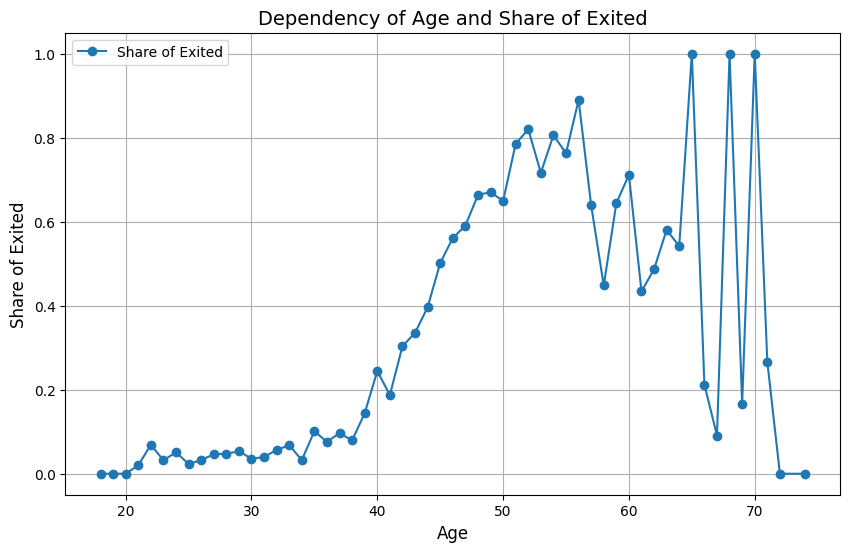

In [9]:
age_exited_share = df.groupby('Age')['Exited'].mean().reset_index()
age_exited_share.rename(columns={'Exited': 'Exited_Share'}, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_exited_share['Age'], age_exited_share['Exited_Share'], marker='o', linestyle='-', label='Share of Exited')
plt.title('Dependency of Age and Share of Exited', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Share of Exited', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

   Zero_Balance  Exited_Share
0         False      0.289083
1          True      0.157257


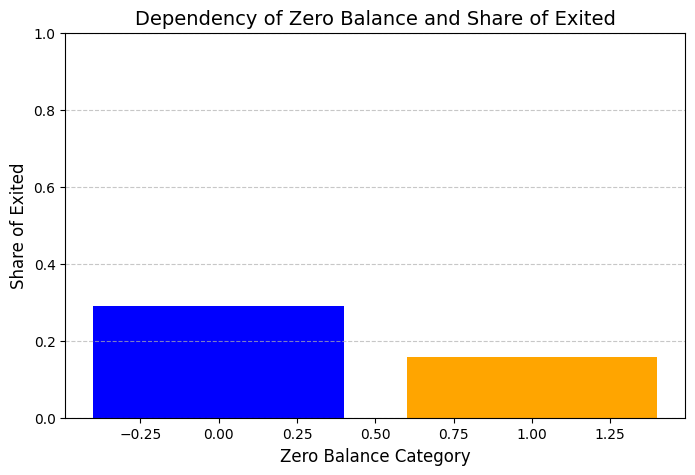

In [10]:
# Create Zero Balance category
df['Zero_Balance'] = df['Balance'] == 0

# Group by Zero_Balance and calculate the share of Exited
zero_balance_exited_share = df.groupby('Zero_Balance')['Exited'].mean().reset_index()
zero_balance_exited_share.rename(columns={'Exited': 'Exited_Share'}, inplace=True)

print(zero_balance_exited_share)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(zero_balance_exited_share['Zero_Balance'], zero_balance_exited_share['Exited_Share'], color=['blue', 'orange'])
plt.title('Dependency of Zero Balance and Share of Exited', fontsize=14)
plt.xlabel('Zero Balance Category', fontsize=12)
plt.ylabel('Share of Exited', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Conclusion 
- Age: The share of exited customers is very low for younger age groups, suggesting that younger customers are more likely to stay.
- Zero Balance: Customers with a “Zero Balance” have a noticeably lower share of exited cases than those with a “Non-Zero Balance” which is strange.
- Customers with 3 or more products have the highest exit rates, while those with 2 products have the lowest.

In [11]:
from sklearn.preprocessing import OneHotEncoder

#Let us encode our additional findings
train_inputs['Age_40_plus'] = train_inputs['Age'] >= 40
val_inputs['Age_40_plus'] = val_inputs['Age'] >= 40

train_inputs['Zero_Balance'] = train_inputs['Balance'] == 0
val_inputs['Zero_Balance'] = val_inputs['Balance'] == 0

categorical_cols_ohe = ['Geography','Gender','NumOfProducts','Age_40_plus','Zero_Balance']
encoder = OneHotEncoder(drop='if_binary',sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols_ohe])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols_ohe))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols_ohe])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols_ohe])

In [12]:
from sklearn.preprocessing import MinMaxScaler

# We are excluding the column NumOfProducts from the numeric columns since it has a nonlinear impact on the exited share.
exclude_cols = ['NumOfProducts']

numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [13]:
pd.set_option('display.max_columns', None)
display(train_inputs.head(5)), display(val_inputs.head(5))

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_40_plus,Zero_Balance,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_40_plus_True,Zero_Balance_True
3709,0.247283,0.989243,Chijindum,0.446301,Germany,Female,0.285714,0.1,0.627217,2.0,1.0,1.0,0.897211,False,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5745,0.383026,0.996564,Iloerika,0.441527,Germany,Male,0.410714,0.3,0.483585,2.0,1.0,1.0,0.682466,True,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3602,0.240149,0.994766,Ch'en,0.503580,France,Male,0.267857,0.1,0.723923,1.0,1.0,0.0,0.374232,False,False,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
925,0.061671,0.994694,Ugochukwu,0.699284,France,Male,0.267857,0.1,0.000000,2.0,1.0,1.0,0.924229,False,True,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
11868,0.791253,0.990254,Onwuamaeze,0.231504,France,Female,0.250000,0.1,0.509619,1.0,0.0,1.0,0.794453,False,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_40_plus,Zero_Balance,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_40_plus_True,Zero_Balance_True
12482,0.832189,0.995601,Palerma,0.389021,Spain,Male,0.232143,0.8,0.000000,2.0,1.0,0.0,0.328800,False,True,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
12440,0.829389,0.997270,O'Loughlin,0.661098,France,Female,0.357143,0.3,0.000000,2.0,0.0,0.0,0.703739,False,True,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5402,0.360157,0.987375,Fan,0.608592,Germany,Male,0.285714,0.2,0.508416,1.0,1.0,1.0,0.852595,False,False,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3588,0.239216,0.986166,Shih,0.568019,France,Female,0.392857,0.6,0.000000,1.0,1.0,1.0,0.627231,True,True,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
11109,0.740649,0.995655,Tuan,0.381862,France,Male,0.375000,0.0,0.529629,1.0,0.0,1.0,0.374171,False,False,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


(None, None)

5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [14]:
train_inputs.to_parquet('train_inputs.parquet')
train_targets.to_frame().to_parquet('train_targets.parquet')
val_inputs.to_parquet('val_inputs.parquet')
val_targets.to_frame().to_parquet('val_targets.parquet')

In [15]:
!ls

9781801817479_ColorImages.pdf
Copy_of_HW_2_2_Logistic_Regression_With_scikit_learn-Copy1.ipynb
Copy_of_HW_2_2_Logistic_Regression_With_scikit_learn.ipynb
HW_2_1_Linear_regression_with_multiple_features.ipynb
aussie_rain.joblib
bank-customer-churn-prediction-dlu-course-c-2
creds.json
submission_log_reg.csv
submission_log_reg_10.csv
submission_log_reg_2.csv
submission_log_reg_3.csv
submission_log_reg_4.csv
submission_log_reg_5.csv
submission_log_reg_9.csv
submission_log_reg_f.csv
train_inputs.parquet
train_targets.parquet
val_inputs.parquet
val_targets.parquet
Основи роботи з LangChain.ipynb
Побудова додатку з використанням RAG.ipynb


In [16]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (12000, 25)
train_targets: (12000,)
val_inputs: (3000, 25)
val_targets: (3000,)


6. З підготовлених вхідних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [17]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [21]:
confusion_matrix(train_targets, train_preds)

array([[9123,  435],
       [ 821, 1621]])

In [22]:
accuracy_score(train_targets, train_preds)

0.8953333333333333

In [23]:
confusion_matrix(val_targets, val_preds)

array([[2282,  108],
       [ 204,  406]])

In [24]:
accuracy_score(val_targets, val_preds)

0.896

In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score(train_targets, train_preds, pos_label=1)

0.7207647843485994

In [27]:
f1_score(val_targets, val_preds, pos_label=1)

0.7224199288256228

In [28]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.4f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.9270


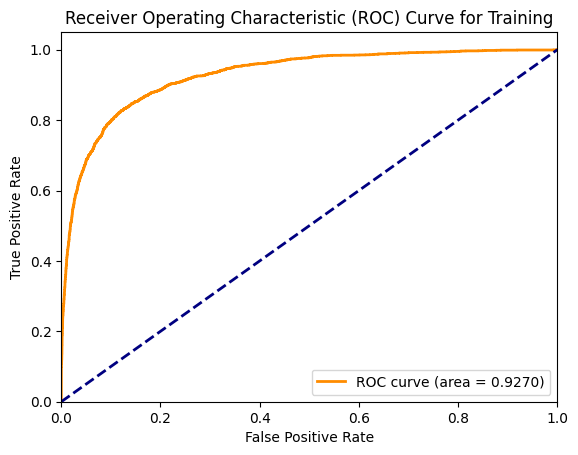

AUROC for Validation: 0.9281


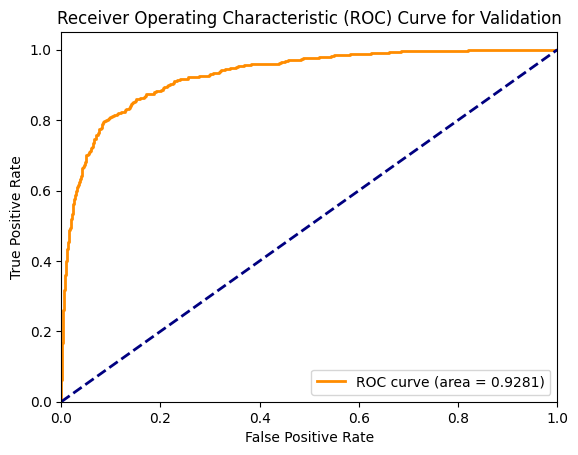

In [29]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

## Conclusion
- Given an AUROC of 0.9287 for validation, we consider our model good.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [30]:
model_major_class = LogisticRegression(solver='liblinear')

In [31]:
train_targets_major_class = 1 - train_targets
val_targets_major_class = 1 - val_targets

In [32]:
model_major_class.fit(X_train, train_targets_major_class)

LogisticRegression(solver='liblinear')

In [33]:
train_preds_major_class = model_major_class.predict(X_train)
val_preds_major_class = model_major_class.predict(X_val)

In [34]:
accuracy_score(train_targets_major_class, train_preds_major_class)

0.8953333333333333

In [35]:
accuracy_score(val_targets_major_class, val_preds_major_class)

0.896

In [36]:
f1_score(train_targets_major_class, train_preds_major_class, pos_label=0)

0.7207647843485994

In [37]:
f1_score(val_targets_major_class, val_preds_major_class, pos_label=0)

0.7224199288256228

## Conclusion
Models are the same in quality

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [38]:
import joblib

In [39]:
aussie_rain = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols_ohe
}

In [40]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [41]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [42]:
model_2 = aussie_rain2['model']

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [43]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols_ohe,input_df: pd.DataFrame):

    input_df['Zero_Balance'] = input_df['Balance'] == 0
    input_df['Age_40_plus'] = input_df['Age'] >= 40
    
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols_ohe])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [44]:
raw_df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/test.csv') 

In [45]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [46]:
raw_df_pred = raw_df.copy()
raw_df_pred['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols_ohe,raw_df_pred)

In [47]:
raw_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,19999.50000,1.569344e+07,658.091500,37.882600,5.042000,42828.366454,1.585600,0.780300,0.481900,1.185294e+05
std,2886.89568,7.155043e+04,72.168634,8.166143,2.797681,59904.661559,0.530943,0.414064,0.499697,7.558253e+04
min,15000.00000,1.556588e+07,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.477300e+02
25%,17499.75000,1.563539e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,8.341915e+04
50%,19999.50000,1.569083e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.229254e+05
75%,22499.25000,1.575941e+07,708.000000,42.000000,7.000000,109927.335000,2.000000,1.000000,1.000000,1.557898e+05
max,24999.00000,1.581566e+07,850.000000,74.000000,11.000000,186788.960000,4.000000,1.000000,1.000000,6.090906e+06


In [48]:
raw_df_pred.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_40_plus_True,Zero_Balance_True,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.333389,0.991411,0.541984,0.355046,0.504200,0.204171,1.585600,0.780300,0.481900,0.592646,0.59550,0.183400,0.221100,0.555800,0.432000,0.552400,0.013600,0.002000,0.354600,0.650000,0.209602
std,0.192473,0.005027,0.172240,0.145824,0.279768,0.285577,0.530943,0.414064,0.499697,0.377949,0.49082,0.387013,0.415008,0.496901,0.495379,0.497272,0.115829,0.044679,0.478416,0.476993,0.291577
min,1.000067,0.982450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002181,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000409
25%,1.166728,0.987334,0.408115,0.250000,0.300000,0.000000,1.000000,1.000000,0.000000,0.417078,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013975
50%,1.333389,0.991228,0.548926,0.339286,0.500000,0.000000,2.000000,1.000000,0.000000,0.614628,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.055947
75%,1.500050,0.996046,0.661098,0.428571,0.700000,0.524044,2.000000,1.000000,1.000000,0.778965,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.282289
max,1.666711,0.999998,1.000000,1.000000,1.100000,0.890458,4.000000,1.000000,1.000000,30.457378,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997943


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [49]:
sample_submission_df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/sample_submission.csv')

In [50]:
sample_submission_df['Exited'] = raw_df_pred['Exited']

In [51]:
sample_submission_df.head(5)

,id,Exited
0,15000,0.102297
1,15001,0.007848
2,15002,0.102054
3,15003,0.382164
4,15004,0.039961


In [52]:
sample_submission_df.to_csv('submission_log_reg_10.csv', index=False)